<a href="https://colab.research.google.com/github/Gayathri-kaki/California_housing_Ml_solution/blob/master/California_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California Housing Dataset
Using linear regression

In [0]:
%tensorflow_version 2.x

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from matplotlib import pyplot as plt

#The following lines adjust the granularity of reporting.
pd.options.display.max_rows=10
pd.options.display.float_format="{:.1f}".format
tf.keras.backend.set_floatx('float32')
print("Imported Modules")


Imported Modules


In [0]:
#Load the dataset
train_df =pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

#Scale the label
scale_factor =1000.0
#scale the training set's label
train_df["median_house_value"]/=scale_factor
#scale the test set's label
test_df["median_house_value"]/=scale_factor

#shuffle the examples
train_df=train_df.reindex(np.random.permutation(train_df.index))

# Represent latitude and longitude as floating-point values
Here we use latitude and longitude features and create a feature layer,i,e our model trains on this two features.
Because a neighborhood's location is typically the most important feature in determining a house's value.


In [0]:
#Create an empty list that will eventually hold all feature columns.
feature_columns=[]

#create a numerical feature column to represent latitude.
latitude = tf.feature_column.numeric_column("latitude")
feature_columns.append(latitude)
#create a numerical feature column to represent longitude.
longitude = tf.feature_column.numeric_column("longitude")
feature_columns.append(longitude)
#Convert the list of feature columns into a layer that will ultimately become part of the model.

fp_feature_layer=layers.DenseFeatures(feature_columns)

# Define functions that create and train a model,and a plotting function
The following code defines three functions:



*  create_model, which tells TensorFlow to build a linear regression model and to use the feature_layer_as_fp as the representation of the model's features.
*   train_model, which will ultimately train the model from training set examples.

*  plot_the_loss_curve, which generates a loss curve.







In [7]:
#define functions to create model,train and plot loss curve
def create_model(my_learning_rate, feature_layer):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(feature_layer)

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, dataset, epochs, batch_size, label_name):
  """Feed a dataset into the model in order to train it."""

  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the mean absolute error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse   


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.94, rmse.max()* 1.05])
  plt.show()  

print("Defined the create_model, train_model, and plot_the_loss_curve functions.")

Defined the create_model, train_model, and plot_the_loss_curve functions.


# Train the model with floating point representations


Epoch 1/30
170/170 [==============================] - 0s 1ms/step - loss: 14009.4971 - root_mean_squared_error: 118.3617
Epoch 2/30
170/170 [==============================] - 0s 1ms/step - loss: 13468.9277 - root_mean_squared_error: 116.0557
Epoch 3/30
170/170 [==============================] - 0s 1ms/step - loss: 13414.2559 - root_mean_squared_error: 115.8199
Epoch 4/30
170/170 [==============================] - 0s 1ms/step - loss: 13371.0146 - root_mean_squared_error: 115.6331
Epoch 5/30
170/170 [==============================] - 0s 1ms/step - loss: 13345.8643 - root_mean_squared_error: 115.5243
Epoch 6/30
170/170 [==============================] - 0s 1ms/step - loss: 13304.0107 - root_mean_squared_error: 115.3430
Epoch 7/30
170/170 [==============================] - 0s 1ms/step - loss: 13250.7725 - root_mean_squared_error: 115.1120
Epoch 8/30
170/170 [==============================] - 0s 1ms/step - loss: 13209.2900 - root_mean_squared_error: 114.9317
Epoch 9/30
170/170 [============

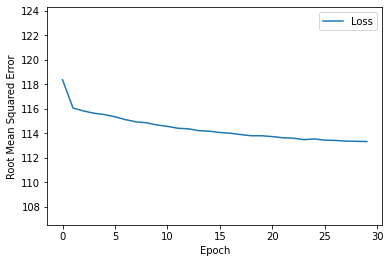


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 1ms/step - loss: 12204.3721 - root_mean_squared_error: 110.4734


[12204.3720703125, 110.47339630126953]

In [13]:
#The following variables are the hyperparameters.
learning_rate=0.05
epochs=30
batch_size=100
label_name='median_house_value'

#create and compile the model's topography
my_model= create_model(learning_rate,fp_feature_layer)

#Train the model on the training set.
epochs,rmse =train_model(my_model,train_df,epochs,batch_size,label_name)
plot_the_loss_curve(epochs,rmse)
print("\n: Evaluate the new model against the test set:")
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

# Representing latitudes and longitudes in buckets

In [0]:
resolution_in_degrees=1.0
#create a new empty list that will eventually hold the generated feature columns.
feature_columns=[]


#Create a bucket feature column for latitude.
latitude_as_numeric_column=tf.feature_column.numeric_column("latitude")
latitude_boundaries=list(np.arange(int(min(train_df['latitude'])),int(max(train_df['latitude'])),resolution_in_degrees))
latitude=tf.feature_column.bucketized_column(latitude_as_numeric_column,latitude_boundaries)
feature_columns.append(latitude)


#create a bucket feature column for longitude
longitude_as_numeric_column=tf.feature_column.numeric_column("longitude")
longitude_boundaries=list(np.arange(int(min(train_df['longitude'])),int(max(train_df['longitude'])),resolution_in_degrees))
longitude=tf.feature_column.bucketized_column(longitude_as_numeric_column,longitude_boundaries)
feature_columns.append(longitude)


#convert the list of feature columns into a layer that will ultimately become the part of the model
buckets_feature_layer=layers.DenseFeatures(feature_columns)

# Train the model with bucket representations

Epoch 1/35
170/170 [==============================] - 0s 1ms/step - loss: 52009.1055 - root_mean_squared_error: 228.0551
Epoch 2/35
170/170 [==============================] - 0s 1ms/step - loss: 44615.6250 - root_mean_squared_error: 211.2241
Epoch 3/35
170/170 [==============================] - 0s 1ms/step - loss: 38034.8945 - root_mean_squared_error: 195.0254
Epoch 4/35
170/170 [==============================] - 0s 1ms/step - loss: 32215.0293 - root_mean_squared_error: 179.4854
Epoch 5/35
170/170 [==============================] - 0s 1ms/step - loss: 27206.4141 - root_mean_squared_error: 164.9437
Epoch 6/35
170/170 [==============================] - 0s 1ms/step - loss: 22939.1250 - root_mean_squared_error: 151.4567
Epoch 7/35
170/170 [==============================] - 0s 1ms/step - loss: 19445.9902 - root_mean_squared_error: 139.4489
Epoch 8/35
170/170 [==============================] - 0s 1ms/step - loss: 16658.2051 - root_mean_squared_error: 129.0667
Epoch 9/35
170/170 [============

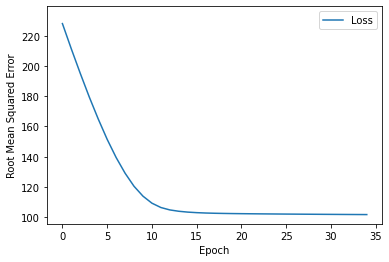


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 1ms/step - loss: 10198.0752 - root_mean_squared_error: 100.9855


[10198.0751953125, 100.98551177978516]

In [17]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 35

# Build the model, this time passing in the buckets_feature_layer.
my_model = create_model(learning_rate, buckets_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

#Represent location as a feature cross
The following code cell represents locations as a feature cross.That is,the following code cell first creates the buckets and then calls `tf.feature_column.crossed_column` to cross the buckets.



In [0]:
resolution_in_degrees = 1.5

# Create a new empty list that will eventually hold the generated feature column.
feature_columns = []

# Create a bucket feature column for latitude.
latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])), int(max(train_df['latitude'])), resolution_in_degrees))
latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, latitude_boundaries)

# Create a bucket feature column for longitude.
longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])), int(max(train_df['longitude'])), resolution_in_degrees))
longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column, longitude_boundaries)

# Create a feature cross of latitude and longitude.
latitude_x_longitude = tf.feature_column.crossed_column([latitude, longitude], hash_bucket_size=100)
crossed_feature = tf.feature_column.indicator_column(latitude_x_longitude)
feature_columns.append(crossed_feature)

# Convert the list of feature columns into a layer that will later be fed into
# the model. 
feature_cross_feature_layer = layers.DenseFeatures(feature_columns)

Epoch 1/35
170/170 [==============================] - 0s 1ms/step - loss: 53504.7773 - root_mean_squared_error: 231.3110
Epoch 2/35
170/170 [==============================] - 0s 1ms/step - loss: 48385.1055 - root_mean_squared_error: 219.9662
Epoch 3/35
170/170 [==============================] - 0s 1ms/step - loss: 43637.6836 - root_mean_squared_error: 208.8963
Epoch 4/35
170/170 [==============================] - 0s 1ms/step - loss: 39224.7930 - root_mean_squared_error: 198.0525
Epoch 5/35
170/170 [==============================] - 0s 1ms/step - loss: 35173.8750 - root_mean_squared_error: 187.5470
Epoch 6/35
170/170 [==============================] - 0s 1ms/step - loss: 31468.2031 - root_mean_squared_error: 177.3928
Epoch 7/35
170/170 [==============================] - 0s 1ms/step - loss: 28089.2891 - root_mean_squared_error: 167.5986
Epoch 8/35
170/170 [==============================] - 0s 2ms/step - loss: 25050.5645 - root_mean_squared_error: 158.2737
Epoch 9/35
170/170 [============

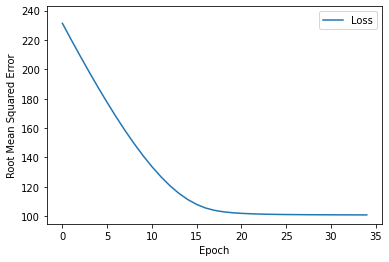


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 1ms/step - loss: 9733.9219 - root_mean_squared_error: 98.6606


[9733.921875, 98.66063690185547]

In [26]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 35

# Build the model, this time passing in the feature_cross_feature_layer: 
my_model = create_model(learning_rate, feature_cross_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)